In [67]:
# unresolved username ownership
# poopdwogga


In [68]:
def load_txt(path):
    with open(path, "r", encoding="utf-8") as f:
        return f.read()

cpvp_lt_mct_data = load_txt("result_data/cpvp_lt_mct.txt")
cpvp_mct_data    = load_txt("result_data/cpvp_mct.txt")

mace_mct_data    = load_txt("result_data/mace_mct.txt")

uhc_mct_data     = load_txt("result_data/uhc_mct.txt")
uhc_pvpt_data    = load_txt("result_data/uhc_pvpt.txt")

axe_mct_data     = load_txt("result_data/axe_mct.txt")

smp_mct_data     = load_txt("result_data/smp_mct.txt")
smp_pvpt_data    = load_txt("result_data/smp_pvpt.txt")

data = (cpvp_lt_mct_data + cpvp_mct_data)
#data = mace_mct_data
#data = (uhc_pvpt_data + uhc_mct_data)

In [69]:
import re

data = data.lower().strip()
data = re.sub("won", "", data)
data = re.sub("lost", "", data)
data = "\n".join([s for s in data.split("\n") if s]) # remove empty lines
data = "\n".join([s for s in data.split("\n") if not (s.__contains__("strikes") or s.__contains__("fight") or s.__contains__("eval"))]) # Remove lines that contain fight information like "HT3 Fights:" or "LT1 Fights"
data = "\n".join([s for s in data.split("\n") if not (s.__contains__("evaluation"))]) # Remove lines that say "passed evaluation"
data = re.sub(r"^@[^-]+-\s*([^-]+)\s*-.*$", r"\1", data, flags=re.MULTILINE) # removes the discord username and the promotion / demotion message and leaves only the username: "@marlow - marlowww - placed back high tier 1" => "marlowww"

lines = data.split("\n") # remove the authors of each discord message from the string
data = "\n".join(
    line for i, line in enumerate(lines)
    if not (i + 1 < len(lines) and lines[i + 1].strip() == "—")
)

#print(data)

In [70]:
from datetime import datetime

# Turn the string into an array of messages, where each message is itself an array that contains each individual line
messages = [
    [line.strip() for line in message.strip().split("\n") if line.strip()]
    for message in data.split("—") if message.strip()
]

# Define a function to extract and parse the date from the first line of each message
def parse_date(message):
    date_str = message[0].split(",")[0].strip() + "," + message[0].split(",")[1]
    return datetime.strptime(date_str, "%d/%m/%Y, %H:%M")

# Sort the messages in ascending order by date
messages.sort(key=parse_date)

# Keep first two entries fixed, reverse everything after
for i, m in enumerate(messages):
    if len(m) > 2:
        messages[i] = m[:2] + m[2:][::-1]

# Debug print
for m in messages:
    print(m)
#print(messages)

['23/04/2022, 02:00', 'vizzzo', '0-4 g8ev']
['23/04/2022, 03:56', 'ryrv', '0-3 itzrealme', '1-3 marlowww']
['23/04/2022, 06:20', 'marlowww', '0-3 itzrealme']
['26/04/2022, 00:12', 'lurrn', '0-3 g8ev', '3-1 ryrv']
['26/04/2022, 00:21', 'nnlarp', '3-0 lurrn', '3-2 arzs', '4-0 vizzzo']
['11/05/2022, 06:08', 'ninety9colors', '3-2 ceeew', '3-2 godlygobber', '3-0 frwog', '3-2 crey6712', '3-1 ztyler', '3-0 ghostcrystals', '3-1 styl_']
['11/05/2022, 06:08', 'dreamsan', '3-0 ceeew', '3-0 mesticalic', '3-0 syndicatena', '3-1 ztyler']
['28/05/2022, 22:18', 'nnlarp', '1-3 dreamsan']
['02/06/2022, 21:02', 'anchoraura', '0-3 camcal', '3-1 crey6712', '2-4 m4rzz']
['02/06/2022, 21:02', 'anchoraura', '0-3 camcal', '3-1 crey6712', '2-4 m4rzz']
['04/06/2022, 00:15', 'dreamsan', 'vizzzo 3-0', 'ryrv 3-0', 'g8ev 3-1']
['12/06/2022, 07:00', 'lurrn', '1-3 ryrv']
['15/06/2022, 01:32', '_styl', '1-3 ninety9colors']
['15/06/2022, 15:43', 'lclly', '1-3 izw']
['15/06/2022, 15:43', '0kbx', '1-3 izw']
['15/06/2022, 

In [71]:
allplayers = set()

for result in messages:
  if len(result) <= 1:
    print(result)
  else:
    allplayers.add(result[1])
  for match in result[2:]:
    allplayers.add(match[4:])

print(allplayers)
print(len(allplayers))

{'', 'catmenmert', 'shubdarizzler_', 'zerqyn', 'pr1mx', 'quack56', 'kerosense', 'abvoltstaybetter', 'uchika2015', 'sirjapmxvi', 'aximity', 'gonas3434', 'grouwin_', 'oddsophia', 'rf_zalu', 'freemyswagx2', 'newht3comingup', 'tezui', 'vanmppp', 'rawzng', 'iambetteratmath', 'imonlyahuman', 'chubnubyt', 'darkcloud0', 'spookykrit', 'yerkcets', 'twototem', 'gfwgsvkjsdflkhga', '@quit.  - mcfn_ - failed ht3 test', 'snoozys_', 'obvjack (0-2 then ff)', 'shadowlord_001', 'vxcn', 'snyfort', 'pomojz', 'abelunicornio', "callumm (deadline wasn't met at 1-2)", 'lethaloceanic899', 'bunnyuuu', 'aphrofluff', 'lupz7e', 'rechqrge', 'dxrrkz', 'minorrizzler3', 'leoskidmark', 'mormel123fan', 'imbsoccer617', 'trytryagain_', '2b2tkitten', 'odyluvsvitz', 'nrruro', 'ilovedaddysamy(mexus)', 'cpvpclapzy', 'mswwy', 'iamfemboy69', 'hehehehehahahheh', 'zokies', 'icoskitten', 'furnacedfanuwu', 'xx_marlowfan_xx', 'gearszero', '__corleone_', 'ufyuson', 'sillycatlover_', 'o7d9e4t1c', 'its_rexi', 'val3entine', 'toroware', '

In [72]:
from datetime import datetime, timedelta
from typing import Dict, List, Tuple

FT4_GM = True

# --- Config ---
DEFAULT_ELO = 2000

K = 70 if FT4_GM else 100
DATE_FORMAT = "%d/%m/%Y, %H:%M"
DUPLICATE_WINDOW = timedelta(days=30)
COUNT_INDIVIDUAL_ROUNDS = False if FT4_GM else False
BASE_WEIGHT = 0.1
ITERATION_COUNT = 10
RESET_DIVISOR = 1.8


# --- ELO helpers ---
def expected_score(rating_a: float, rating_b: float) -> float:
    return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))


def update_elo(r1: float, r2: float, score: float) -> Tuple[float, float]:
    e1 = expected_score(r1, r2)
    e2 = expected_score(r2, r1)
    return r1 + K * (score - e1), r2 + K * ((1 - score) - e2)


def parse_match_result(result: str) -> Tuple[str, int, int]:
    """Parse '4-2 opponent' → ('opponent', 4, 2)"""
    parts = result.strip().split()
    if len(parts) < 2 or '-' not in parts[0]:
        return None, 0, 0
    try:
        wins, losses = map(int, parts[0].split('-'))
        opponent = parts[1].lower()
        return opponent, wins, losses
    except Exception:
        return None, 0, 0


# --- Main processing ---
def process_messages(messages: List[List[str]]) -> Dict[str, dict]:
    players: Dict[str, dict] = {}
    # store tuples of (date, p1, p2, wins, losses)
    recent_matches: List[Tuple[datetime, str, str, int, int]] = []

    for _ in range(ITERATION_COUNT):  # repeated reprocessing loop

        recent_matches.clear()
        for data in players.values():
            data["history"].clear()

            # Soft reset elo before next iteration
            if data["elo"] > DEFAULT_ELO:
                data["elo"] = DEFAULT_ELO + ((data["elo"] - DEFAULT_ELO) / RESET_DIVISOR)
                

            # Reset peak for the next iteration
            data["peak"] = data["elo"]

        for entry in messages:
            if len(entry) < 2:
                print(entry)
                continue

            date_str, player = entry[0], entry[1].lower()
            date = datetime.strptime(date_str, DATE_FORMAT)

            # Initialize player
            players.setdefault(player, {"elo": DEFAULT_ELO, "peak": DEFAULT_ELO, "history": []})
            players[player]["history"].append((date, players[player]["elo"]))

            for match in entry[2:]:
                opponent, wins, losses = parse_match_result(match)
                if not opponent:
                    continue

                players.setdefault(opponent, {"elo": DEFAULT_ELO, "peak": DEFAULT_ELO, "history": []})
                players[opponent]["history"].append((date, players[opponent]["elo"]))

                # keep only matches in the time window
                recent_matches = [
                    (d, p1, p2, w, l)
                    for d, p1, p2, w, l in recent_matches
                    if date - d <= DUPLICATE_WINDOW
                ]

                # skip if exact same pair and same score seen within window
                pair = tuple(sorted([player, opponent]))
                is_duplicate = any(
                    p1 == pair[0] and p2 == pair[1] and ((w == wins and l == losses) or (w == losses and l == wins))
                    for d, p1, p2, w, l in recent_matches
                )
                if is_duplicate:
                    #print(f"Skipped P: {player}, O: {opponent}")
                    continue

                recent_matches.append((date, *pair, wins, losses))

                # --- ELO update logic ---
                r1, r2 = players[player]["elo"], players[opponent]["elo"]
                
                if COUNT_INDIVIDUAL_ROUNDS:
                    for _ in range(wins):
                        r1, r2 = update_elo(r1, r2, 1)
                    for _ in range(losses):
                        r1, r2 = update_elo(r1, r2, 0)
                else:
                    total = wins + losses
                    if total == 0:
                        score_p1 = 0.5
                    else:
                        ratio = wins / total
                        if wins > losses:
                            score_p1 = BASE_WEIGHT + (1 - BASE_WEIGHT) * ratio
                        elif losses > wins:
                            score_p1 = (1 - BASE_WEIGHT) * ratio
                        else:
                            score_p1 = 0.5
                    r1, r2 = update_elo(r1, r2, score_p1)

                # --- Update player data ---
                players[player]["elo"], players[opponent]["elo"] = r1, r2
                players[player]["peak"] = max(players[player]["peak"], r1)
                players[opponent]["peak"] = max(players[opponent]["peak"], r2)

                # record ELO progression
                players[player]["history"].append((date, r1))
                players[opponent]["history"].append((date, r2))

    return players



In [73]:
from datetime import datetime, timedelta
from typing import Dict

def print_leaderboard(
    players: Dict[str, dict],
    sort_by: str = "elo",
    top_n: int = 100000,
    inclTier: bool = False,
    active_within_days: int = None,
    up_to_date: str = None,
):
    """
    Prints the ELO leaderboard.

    - up_to_date: optional string in DATE_FORMAT (e.g. "15/07/2025, 00:00").
                 If provided, the leaderboard will be a snapshot "as of" that datetime.
    - active_within_days: if provided, filters players who have not played within the
                 last `active_within_days` days relative to the snapshot (or now if no snapshot).
    - sort_by: "elo" or "peak" (or any key present in the player snapshot dict).
    """
    now = datetime.now()
    cutoff = None
    if up_to_date:
        cutoff = datetime.strptime(up_to_date, DATE_FORMAT)

    filtered_players = {}

    for name, data in players.items():
        history = data.get("history", [])
        if not history:
            # No history at all -> skip (no known rating)
            continue

        # Build a snapshot for this player either up to cutoff or the full current data
        if cutoff:
            # Keep only last ELO per datetime
            history_by_time = {}
            for d, e in history:
                history_by_time[d] = e  # later entries overwrite earlier ones at same timestamp

            # only include timestamps <= cutoff
            past_entries = [(d, e) for d, e in history_by_time.items() if d <= cutoff]
            if not past_entries:
                continue

            # latest entry
            latest_date, latest_elo = max(past_entries, key=lambda x: x[0])

            # peak up to that point
            peak_up_to = max(e for _, e in past_entries)

            player_snapshot = {
                "elo": latest_elo,
                "peak": peak_up_to,
                "history": past_entries,
            }
            # time reference for active-within calculation is the cutoff
            activity_reference = cutoff
        else:
            # use current data as-is
            player_snapshot = {
                "elo": data.get("elo", DEFAULT_ELO),
                "peak": data.get("peak", DEFAULT_ELO),
                "history": history,
            }
            activity_reference = now

        # Apply active_within_days relative to activity_reference (cutoff or now)
        if active_within_days is not None and player_snapshot.get("history"):
            last_match_date = max(date for date, _ in player_snapshot["history"])
            if (activity_reference - last_match_date) > timedelta(days=active_within_days):
                continue  # inactive relative to reference

        filtered_players[name] = player_snapshot

    # Ensure sort_by exists in snapshot, fallback to 'elo'
    def sort_key(item):
        _, pdata = item
        return pdata.get(sort_by, pdata.get("elo", DEFAULT_ELO))

    sorted_players = sorted(filtered_players.items(), key=sort_key, reverse=True)

    # Print header (show cutoff if present)
    header_date = f" (as of {cutoff.strftime(DATE_FORMAT)})" if cutoff else ""
    print(f"\nLeaderboard{header_date}")
    print(f"{'Rank':<5}{'Player':<20}{'ELO':>8}{'Peak':>8}{'Tier':>8}{'PeakTier':>10}")
    print("-" * 65)

    # helper for tier
    def tier_for(elo_val):
        if elo_val > 2500: return "HT1"
        if elo_val > 2350: return "LT1"
        if elo_val > 2250: return "HT2"
        if elo_val > 2100: return "LT2"
        return "HT3"

    for i, (name, pdata) in enumerate(sorted_players[:top_n], start=1):
        elo = pdata["elo"]
        peak = pdata["peak"]
        if inclTier:
            tier = tier_for(elo)
            peak_tier = tier_for(peak)
            print(f"{i:<5}{name:<20}{elo:>8.0f}{peak:>8.0f}{tier:>8}{peak_tier:>10}")
        else:
            if (sort_by == "peak"):
                print(f"{i:<5}{name:<20}{peak:>8.0f}")
            else:
                print(f"{i:<5}{name:<20}{elo:>8.0f}{peak:>8.0f}")


In [74]:
players = process_messages(messages)

In [75]:
#print_leaderboard(players, sort_by="elo", up_to_date="01/09/2024, 00:00", active_within_days=120, inclTier=True)
print_leaderboard(players, sort_by="peak", active_within_days=None, inclTier=False)
#print_leaderboard(players, sort_by="peak", active_within_days=None, inclTier=False)

#for player, data in players.items():
   #if player=="gallerywalk" or player=="dwggo":
      #print(player)
      #print(data["history"])
      #for a in data["history"]:  # last 5 entries
         #print(a)



Leaderboard
Rank Player                   ELO    Peak    Tier  PeakTier
-----------------------------------------------------------------
1    marlowww                2608
2    testmaster11            2473
3    kingd3fault             2453
4    vrzc                    2451
5    dwggo                   2423
6    evantii                 2422
7    awerial                 2413
8    nopzdaflopper           2405
9    gallerywalk             2404
10   camcal                  2397
11   walksy                  2393
12   crey6712                2391
13   k1rbe                   2384
14   replaqing               2381
15   legertje08              2369
16   wraxps                  2363
17   itzrealme               2363
18   cowarted                2352
19   thiefed                 2338
20   pomojz                  2334
21   kqle_                   2333
22   mystoqn                 2330
23   dagga                   2324
24   c1utch                  2320
25   367k                    2317
26   dexp11

In [76]:

# Your groups
lt2 = ["tollro", "xb4d", "swight", "turrnn", "andrexw", "cpvpekitten", "opaban", "kiyosumiii", "2chrome", "tokenu", "ironzombie71536", "monwy", "qpower", "quelchi", "warrpp", "kingd3fault", "uivn", "slyluvu", "legionofboom", "godlygobber", "vanya_strogo", "ht3boss", "vye1", "realfo6y", "k1rbe", "inthedust", "dwogga", "Kyuwbey", "keptra", "demonmcc", "n1tr0blade"]
ht2 = ["moezoncw", "lalekz", "pomojz", "cowarted", "xmexus", "dwggo", "gallerywalk"]
lt1 = ["kqle_", "thiefed", "evantii"]
ht1 = ["marlowww"]

# Collect ELOs from your existing data
def get_elos(player_list, players_dict):
    return [
        players_dict[name.lower()]["elo"]
        for name in player_list
        if name.lower() in players_dict
    ]

# Gather data
tier_data = {
    #"HT1": get_elos(ht1, players),
    #"LT1": get_elos(lt1, players),
    #"HT2": get_elos(ht2, players),
    #"LT2": get_elos(lt2, players),
    "all": get_elos(players, players),
}



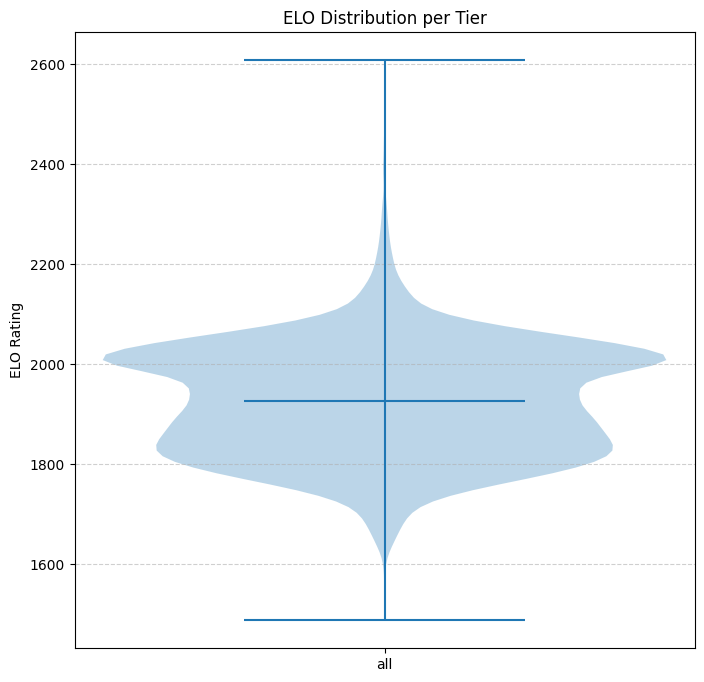

C:\Users\Lucac\AppData\Local\Temp\ipykernel_20564\3230858116.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


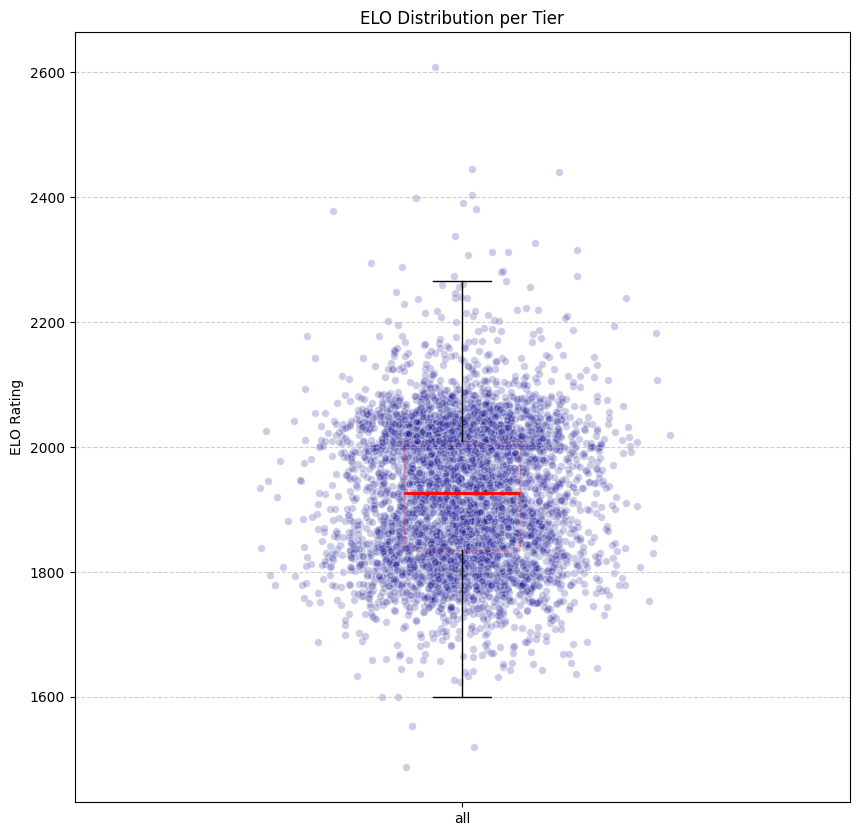

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.violinplot(
    tier_data.values(),
    #showmeans=True,
    showextrema=True,
    showmedians=True
)
plt.xticks(range(1, len(tier_data)+1), tier_data.keys())
plt.title("ELO Distribution per Tier")
plt.ylabel("ELO Rating")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(10, 10))
positions = np.arange(1, len(tier_data) + 1)

# Boxplot (no fliers)
plt.boxplot(
    tier_data.values(),
    labels=tier_data.keys(),
    patch_artist=True,
    showfliers=False,
    boxprops=dict(facecolor="none", color="red", alpha = 0.2),
    medianprops=dict(color="red", linewidth=2),
)

# Overlay individual points
for i, (tier, elos) in enumerate(tier_data.items(), start=1):
    jitter = np.random.normal(0, 0.08, size=len(elos))  # add random horizontal offset
    plt.scatter(
        np.full(len(elos), i) + jitter,
        elos,
        alpha=0.2,
        color="darkblue",
        edgecolor="white",
        s=30,
    )

plt.title("ELO Distribution per Tier")
plt.ylabel("ELO Rating")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

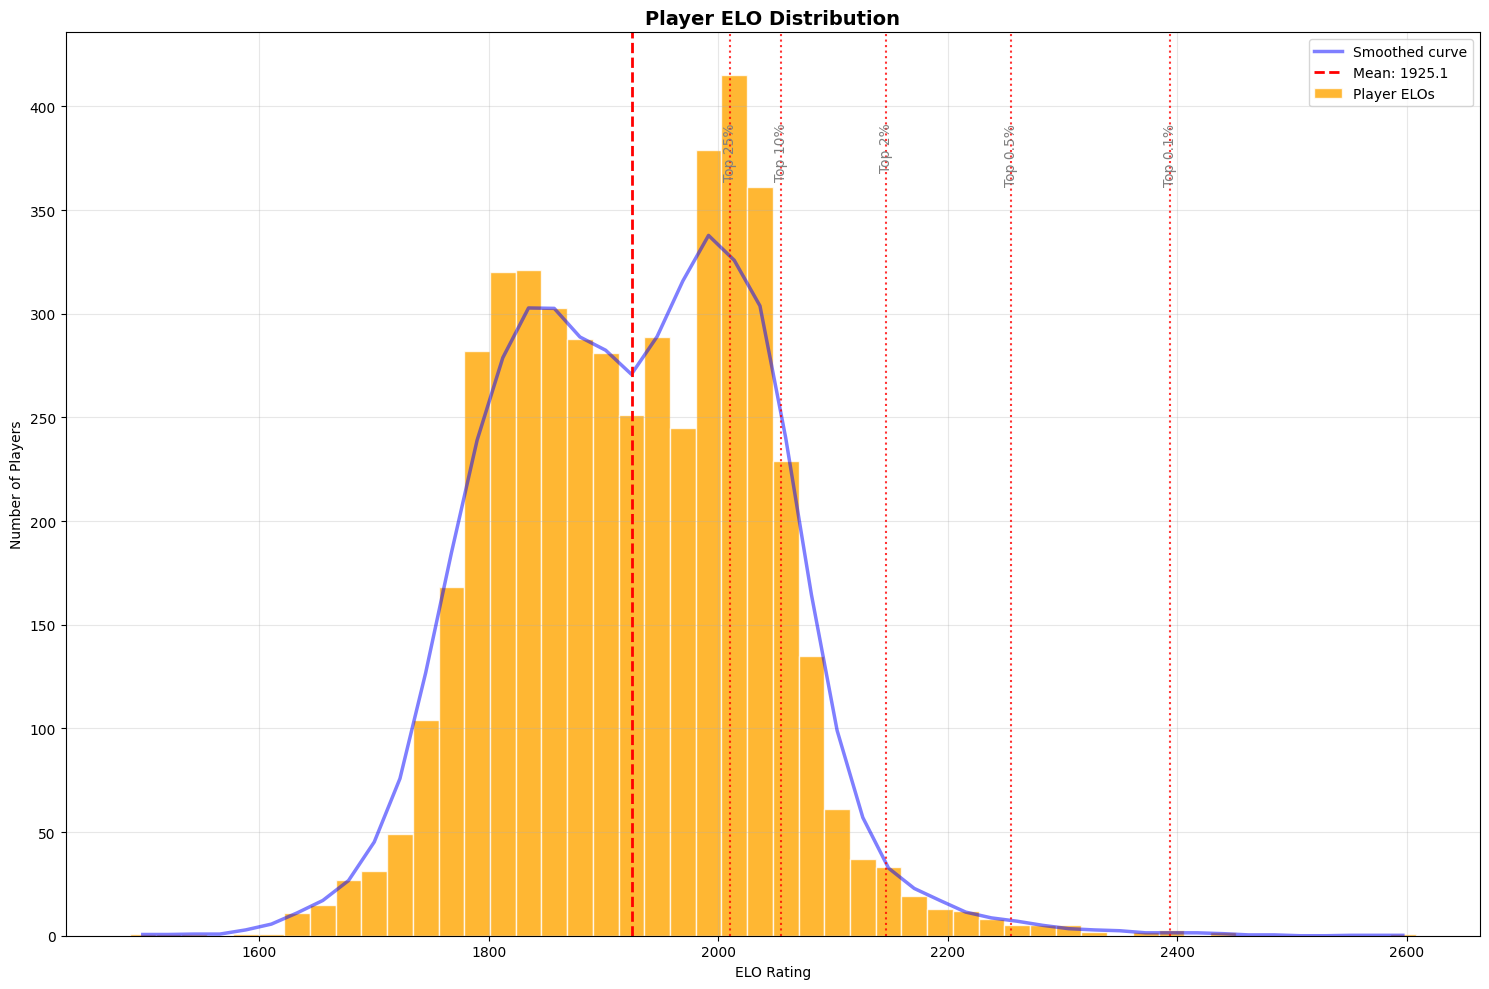

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def plot_elo_distribution(players: dict, bins: int = 40, smooth: bool = True, window: int = 3):
    """
    Plots the ELO distribution of all players with optional smoothing (no SciPy required).

    Args:
        players: dict[str, dict] - player data from process_messages()
        bins: int - number of histogram bins
        smooth: bool - whether to smooth the histogram with a moving average
        window: int - window size for smoothing
    """
    # Collect all ELOs
    elos = np.array([data["elo"] for data in players.values() if "elo" in data])

    if len(elos) == 0:
        print("No ELO data found.")
        return

    # Compute stats
    mean_elo = np.mean(elos)
    median_elo = np.median(elos)


    # Histogram data — now counts, not density
    counts, bin_edges = np.histogram(elos, bins=bins, density=False)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Optional smoothing
    if smooth and len(counts) >= window:
        kernel = np.ones(window) / window
        smooth_counts = np.convolve(counts, kernel, mode='same')
    else:
        smooth_counts = counts

    # Plot
    plt.figure(figsize=(15, 10))

    plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
            color="orange", alpha=0.8, edgecolor="white", label="Player ELOs")

    if smooth:
        plt.plot(bin_centers, smooth_counts, color="blue", linewidth=2.5, alpha=0.5, label="Smoothed curve")

    # Highlight IQR range
    for i in [75, 90, 98, 99.5, 99.9]:
        t = np.percentile(elos, i)
        plt.axvline(t, color="red", linestyle=":", alpha=0.8)
        plt.text(t, plt.ylim()[1]*0.9, f"Top {round(100-i, 1)}%", rotation=90, va="top", ha="center", fontsize=10, color="gray")

    # Mean and median lines
    plt.axvline(mean_elo, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_elo:.1f}")

    plt.title("Player ELO Distribution", fontsize=14, fontweight="bold")
    plt.xlabel("ELO Rating")
    plt.ylabel("Number of Players")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_elo_distribution(players, bins=50, smooth=True, window=5)


In [79]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import timedelta
from collections import defaultdict

def plot_elo_progress(players, sample=None, highlight=None, extend_cutoff_days=200, collapse_daily=True):
    """
    Plots ELO progression for all or selected players.

    Args:
        players: dict of player data (must include "history": list[(datetime, elo)])
        sample: optional list of players to include
        highlight: optional str or list of players to emphasize
        extend_cutoff_days: cutoff for extending line to the latest date
        collapse_daily: if True, keep only the first and last ELO entry per day per player
    """
    plt.figure(figsize=(28, 14))

    # find the latest date overall
    all_dates = [d for p in players.values() for d, _ in p.get("history", [])]
    if not all_dates:
        print("No data to plot.")
        return
    latest_date = max(all_dates)

    # normalize highlight input
    if isinstance(highlight, str):
        highlight = [highlight]
    highlight = set(h.lower() for h in (highlight or []))

    # filter players if sample provided
    if sample:
        selected = {p: players[p] for p in sample if p in players}
    else:
        selected = players

    for name, data in selected.items():
        history = data.get("history", [])
        if not history:
            continue

        history = sorted(history, key=lambda x: x[0])

        # --- Collapse multiple entries on the same day to first + last ---
        if collapse_daily:
            grouped = defaultdict(list)
            for dt, elo in history:
                grouped[dt.date()].append((dt, elo))

            reduced_history = []
            for date, entries in grouped.items():
                entries.sort(key=lambda x: x[0])
                if len(entries) == 1:
                    reduced_history.append(entries[0])
                else:
                    reduced_history.extend([entries[0], entries[-1]])
            history = sorted(reduced_history, key=lambda x: x[0])

        times, elos = zip(*history)
        last_date = times[-1]

        # extend the last elo flat if recent enough
        if latest_date - last_date <= timedelta(days=extend_cutoff_days):
            times = list(times) + [latest_date]
            elos = list(elos) + [elos[-1]]

        name_lower = name.lower()
        if highlight:
            if name_lower in highlight:
                if len(highlight) == 1:
                    plt.plot(times, elos, lw=3.0, alpha=1.0, label=name, color="black", zorder=10)
                else:
                    plt.plot(times, elos, lw=3.0, alpha=1.0, label=name, zorder=10)
            else:
                plt.plot(times, elos, lw=1.2, alpha=0.5, label=name, zorder=1)
        else:
            plt.plot(times, elos, lw=1.2, alpha=1.0, label=name, zorder=1)

    plt.xlabel("Date")
    plt.ylabel("ELO Rating")
    ax = plt.gca()
    ax.yaxis.set_ticks_position('both')   # ticks on left + right
    ax.tick_params(axis='y', labelright=True)  # show labels on right
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_formatter(DateFormatter("%m/%y"))

    # move legend outside, anchored at the top
    # --- Build legend only for top 100 players ---
    top_n = 100
    sorted_players = sorted(players.items(), key=lambda kv: kv[1]["elo"], reverse=True)
    top_players = set(name.lower() for name, _ in sorted_players[:top_n])

    # Filter labels: only keep handles for top 100 names
    handles, labels = plt.gca().get_legend_handles_labels()

    filtered = [
        (h, l) for h, l in zip(handles, labels)
        if l.lower() in top_players
    ]

    if filtered:
        handles, labels = zip(*filtered)
        plt.legend(
            handles,
            labels,
            loc="upper left",
            bbox_to_anchor=(1.02, 1.0),
            fontsize="x-small",
            ncol=1,
            frameon=False,
            title=f"Top {top_n} Players"
        )



    # adjust layout so graph fills the left side nicely
    plt.subplots_adjust(right=0.78, left=0.07, top=0.93, bottom=0.1)
    plt.show()


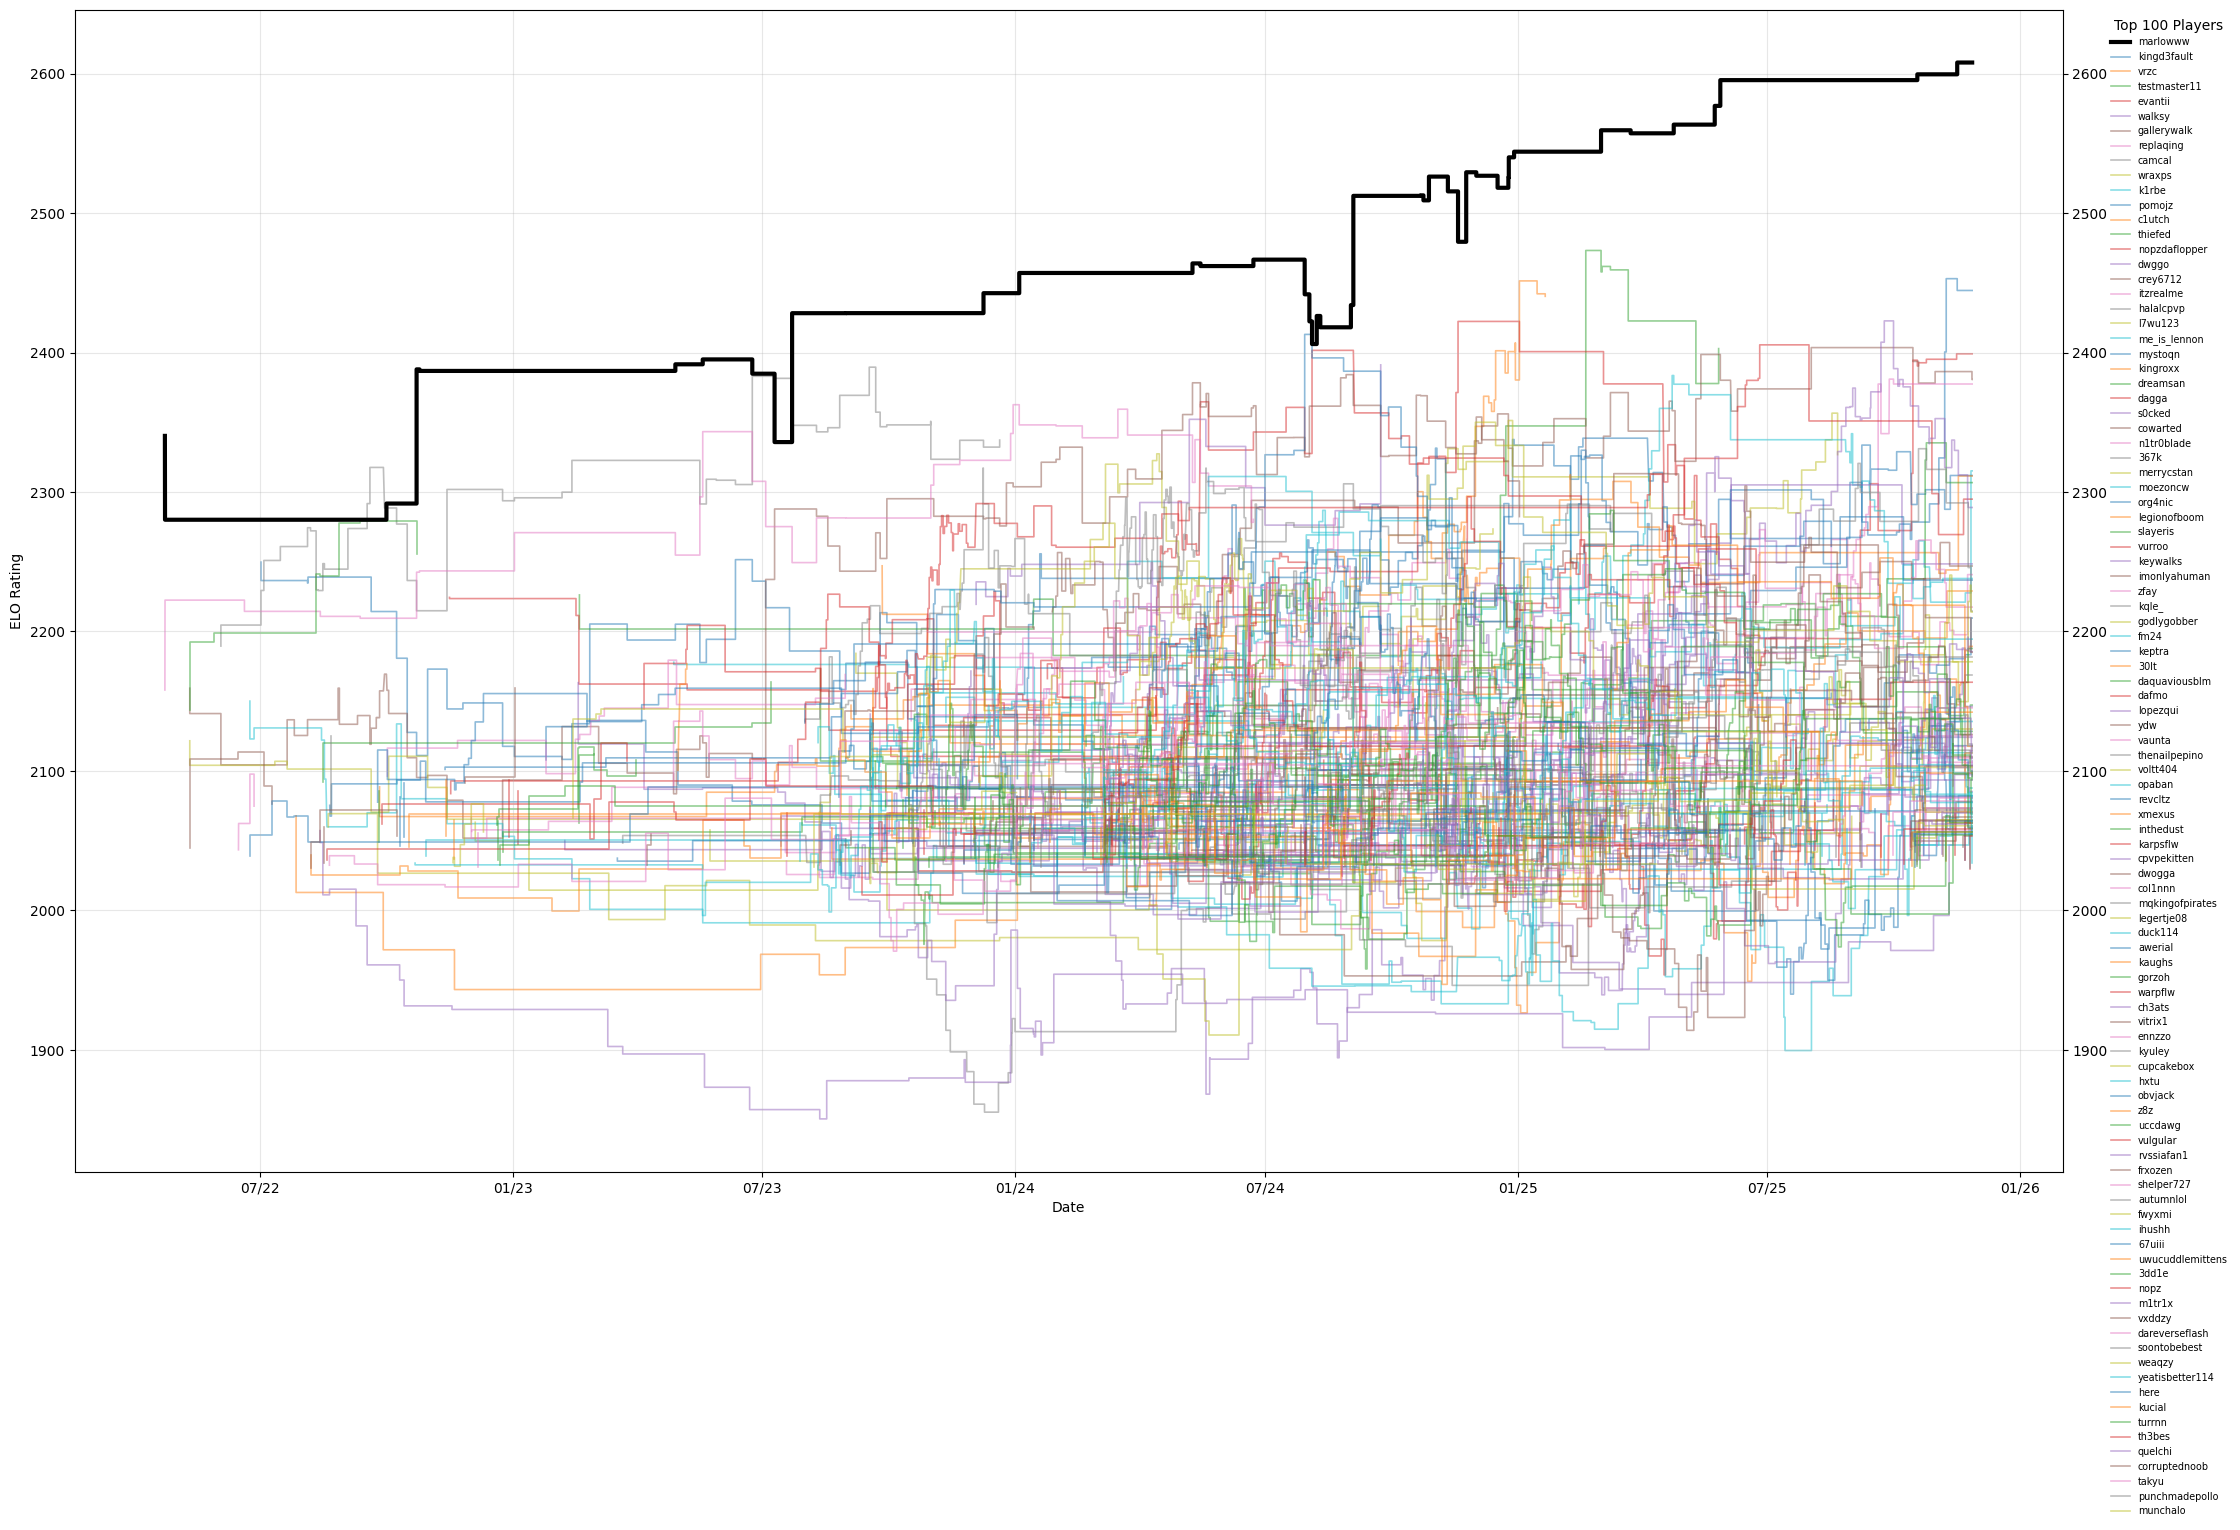

In [82]:
top_n = 500
top_players = sorted(players.items(), key=lambda kv: kv[1]["elo"], reverse=True)[:top_n]

#plot_elo_progress(dict(top_players), sample=["itzrealme", "dreamsan", "marlowww", "crey6712", "camcal", "awerial", "evantii", "wraxps", "gallerywalk"]) # All former HT1s
#plot_elo_progress(dict(top_players), sample=["jaoling", "cowarted", "asteroides", "revcltz", "walksy", "awerial", "2sap", "replaqing", "turrnn", "me_is_lennon", "halalcpvp", "vrzc", "tokenu", "jesprr", "nopzdaflopper", "mystoqn", "vulgular", "lalekz", "daquaviousblm", "quelchi"]) # EU PLAYERS

plot_elo_progress(dict(top_players), highlight=["marlowww"], extend_cutoff_days=60)

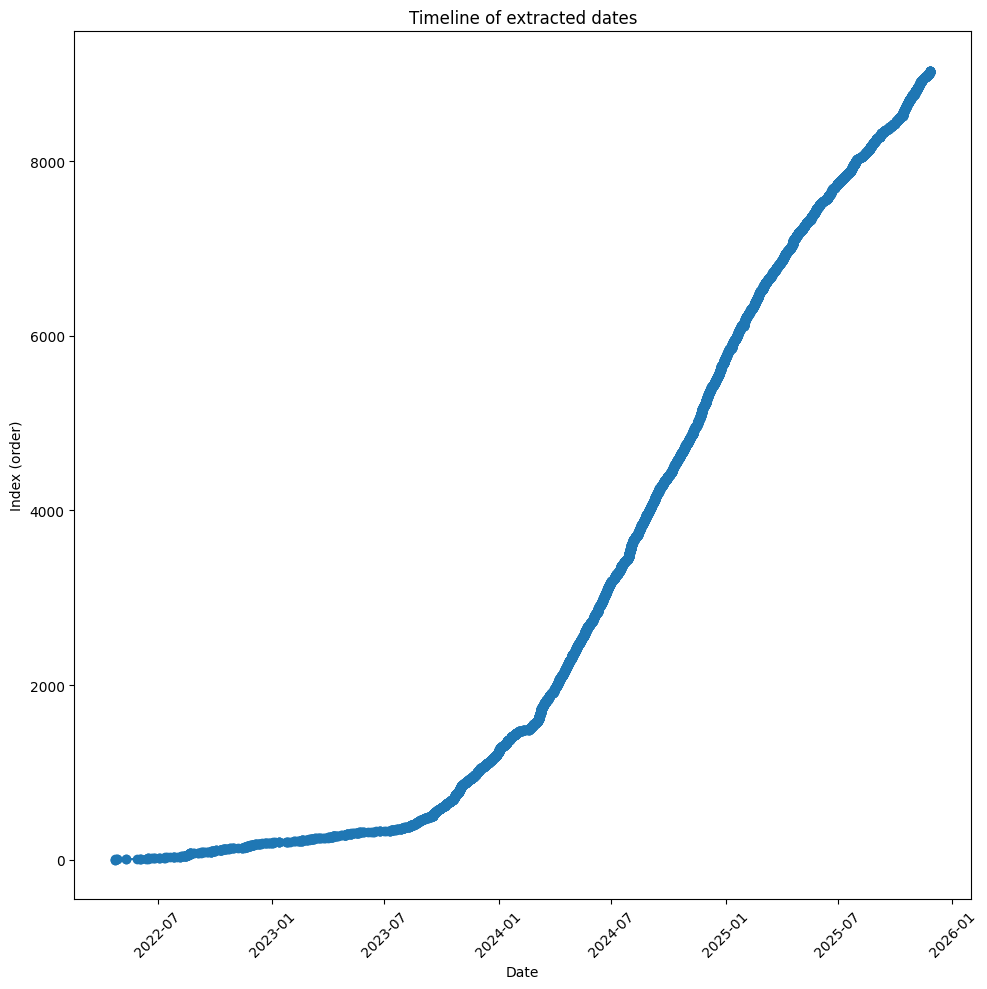

Large gaps found:
From 2022-04-23 06:20:00 to 2022-04-26 00:12:00: 2 days, 17:52:00
From 2022-04-26 00:21:00 to 2022-05-11 06:08:00: 15 days, 5:47:00
From 2022-05-11 06:08:00 to 2022-05-28 22:18:00: 17 days, 16:10:00
From 2022-05-28 22:18:00 to 2022-06-02 21:02:00: 4 days, 22:44:00
From 2022-06-04 00:15:00 to 2022-06-12 07:00:00: 8 days, 6:45:00
From 2022-06-12 07:00:00 to 2022-06-15 01:32:00: 2 days, 18:32:00
From 2022-06-15 18:12:00 to 2022-06-19 23:57:00: 4 days, 5:45:00
From 2022-06-19 23:57:00 to 2022-06-23 18:47:00: 3 days, 18:50:00
From 2022-06-23 23:09:00 to 2022-06-26 23:39:00: 3 days, 0:30:00
From 2022-06-26 23:39:00 to 2022-07-02 00:30:00: 5 days, 0:51:00
From 2022-07-02 00:30:00 to 2022-07-04 02:50:00: 2 days, 2:20:00
From 2022-07-04 02:50:00 to 2022-07-10 03:28:00: 6 days, 0:38:00
From 2022-07-12 02:26:00 to 2022-07-16 02:15:00: 3 days, 23:49:00
From 2022-07-16 02:15:00 to 2022-07-21 01:01:00: 4 days, 22:46:00
From 2022-07-21 01:01:00 to 2022-07-25 20:02:00: 4 days, 19:01:

In [81]:
# FIND LARGE TIME GAPS IN COPY PASTED DATA



import re
from datetime import datetime
import matplotlib.pyplot as plt

# Example long text (replace with your own big string)
text = data

# Step 1: Extract all dates using regex
pattern = r"\d{2}/\d{2}/\d{4}, \d{2}:\d{2}"
matches = re.findall(pattern, text)

# Step 2: Convert to datetime objects
dates = [datetime.strptime(m, "%d/%m/%Y, %H:%M") for m in matches]
dates.sort()  # sort chronologically

# Step 3: Plot the dates
plt.figure(figsize=(10, 10))
plt.plot(dates, range(len(dates)), marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Index (order)")
plt.title("Timeline of extracted dates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: (Optional) Check for big gaps
gaps = []
for i in range(1, len(dates)):
    delta = dates[i] - dates[i-1]
    if delta.total_seconds() > 3600 * 48:  # bigger than 1 day
        gaps.append((dates[i-1], dates[i], delta))

print("Large gaps found:")
for start, end, delta in gaps:
    print(f"From {start} to {end}: {delta}")
